### Import <a id='import'></a>

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, SplineTransformer
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

### Data description <a id='data_description'></a>

In [2]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.select_dtypes(include=['object']).describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

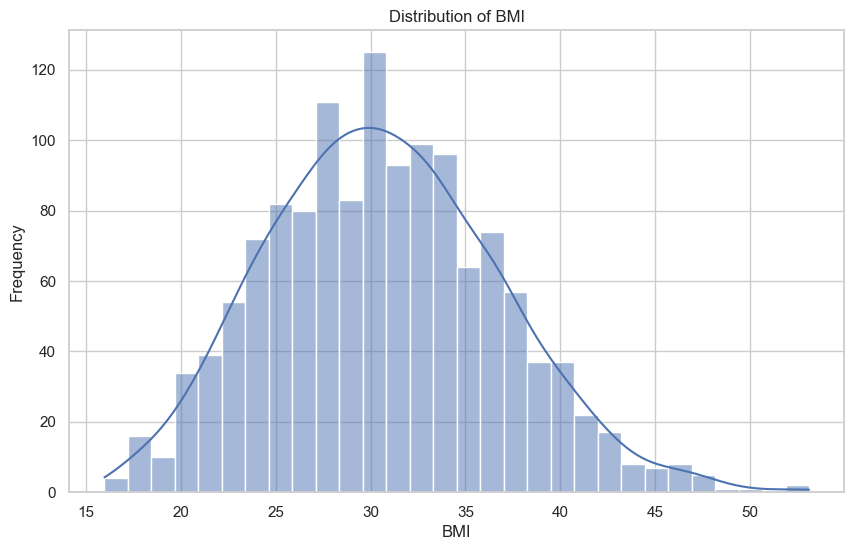

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, color='b', bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


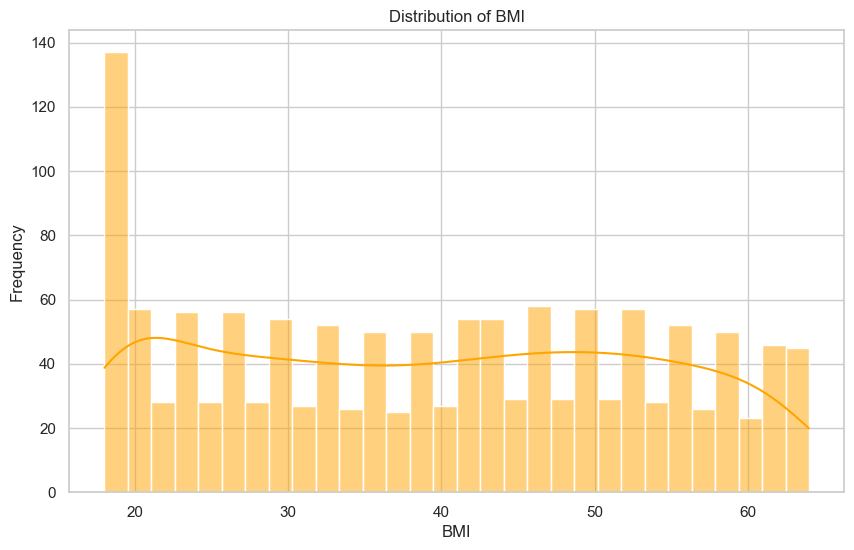

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='orange', bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### Distribution of Medical Insurance Charges <a id='Distribution'></a>

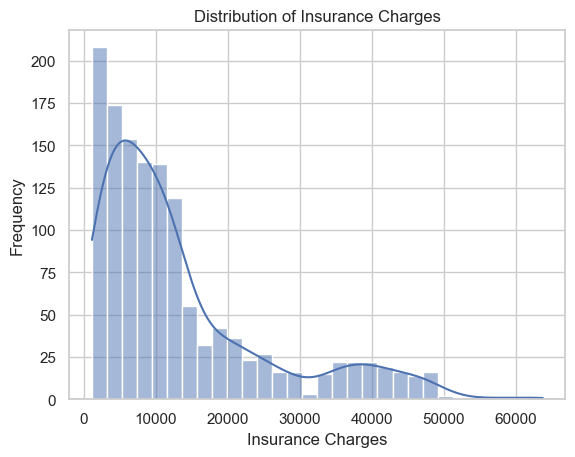

In [9]:
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.show()


### Distribution between Charges and other features <a id='charges_other'></a>

#### Charges, Sex, Smokers <a id='charges_sex_smokers'></a>

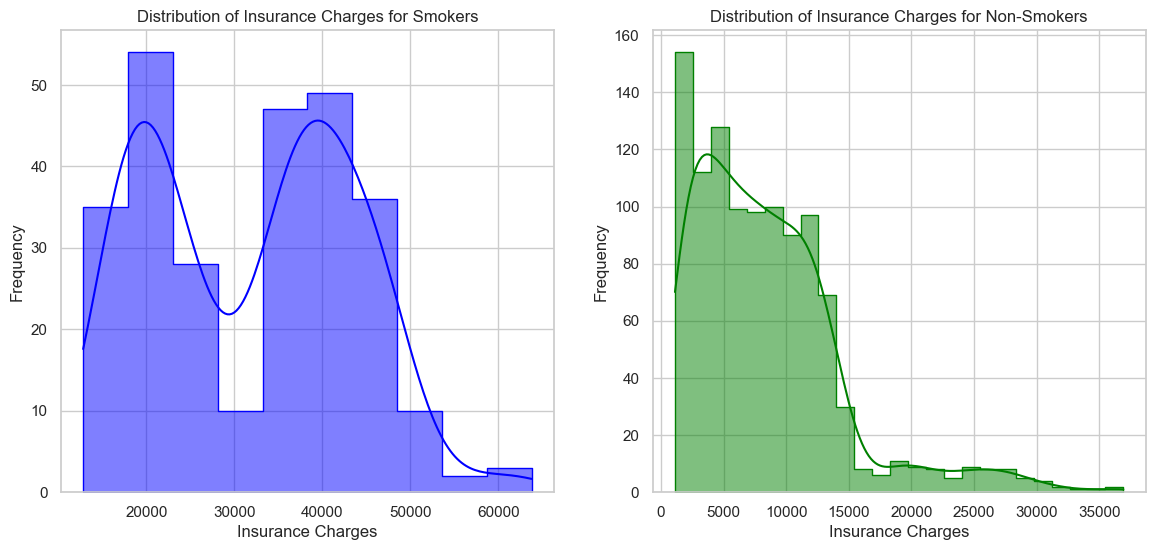

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df[df['smoker']=='yes'], x='charges', kde=True, color='blue', element="step")
plt.title('Distribution of Insurance Charges for Smokers')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df[df['smoker']=='no'], x='charges', kde=True, color='green', element="step")
plt.title('Distribution of Insurance Charges for Non-Smokers')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')

plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


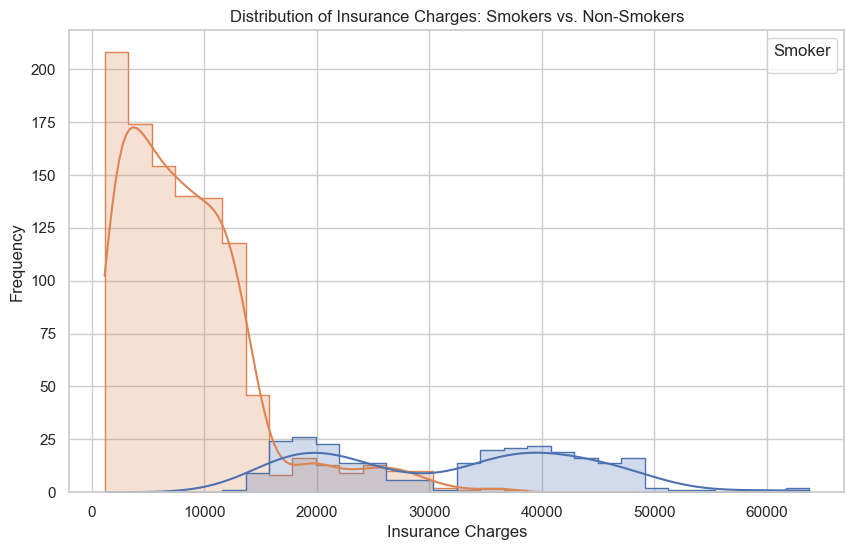

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='charges', hue='smoker', kde=True, element="step", common_norm=False)
plt.title('Distribution of Insurance Charges: Smokers vs. Non-Smokers')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')

plt.legend(title='Smoker', loc='upper right')

plt.show()


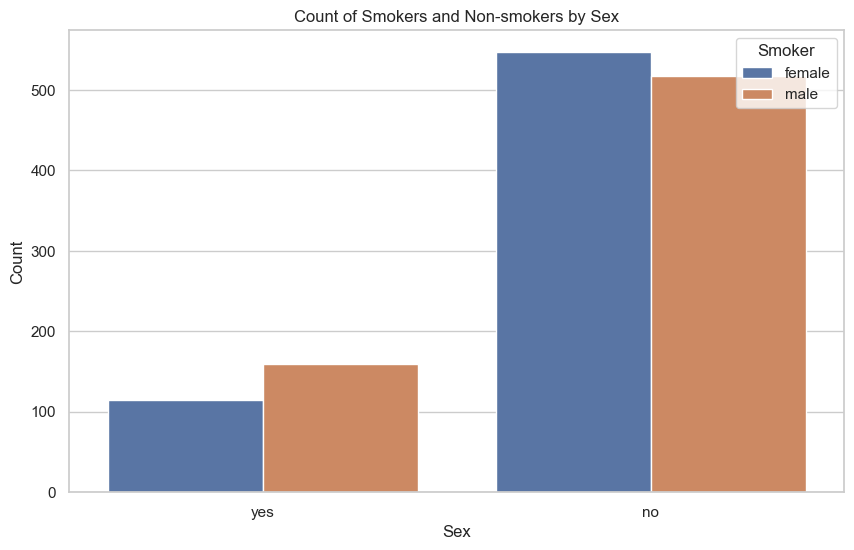

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.countplot(x='smoker', hue='sex', data=df)
plt.title('Count of Smokers and Non-smokers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')

plt.show()


#### Charges and Age <a id='charges_age'></a>

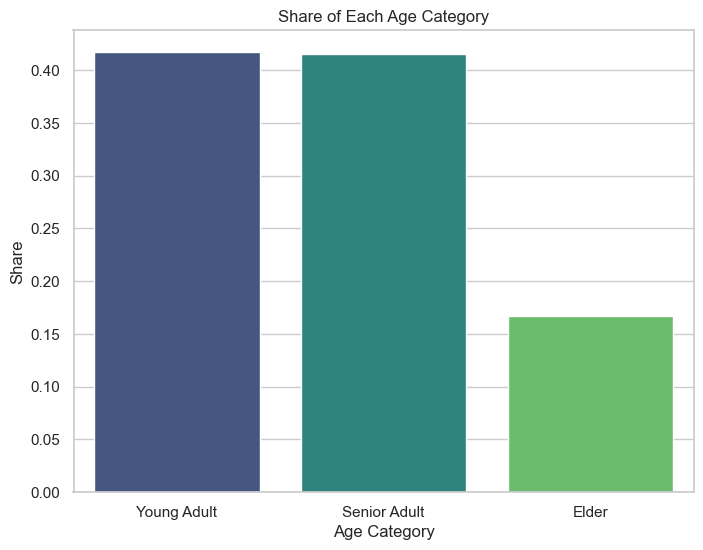

In [13]:
age_bins = [18, 35, 55, df['age'].max()]
age_labels = ['Young Adult', 'Senior Adult', 'Elder']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_category_share = df['age_category'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=age_category_share.index, y=age_category_share.values, palette='viridis')
plt.title('Share of Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Share')
plt.show()



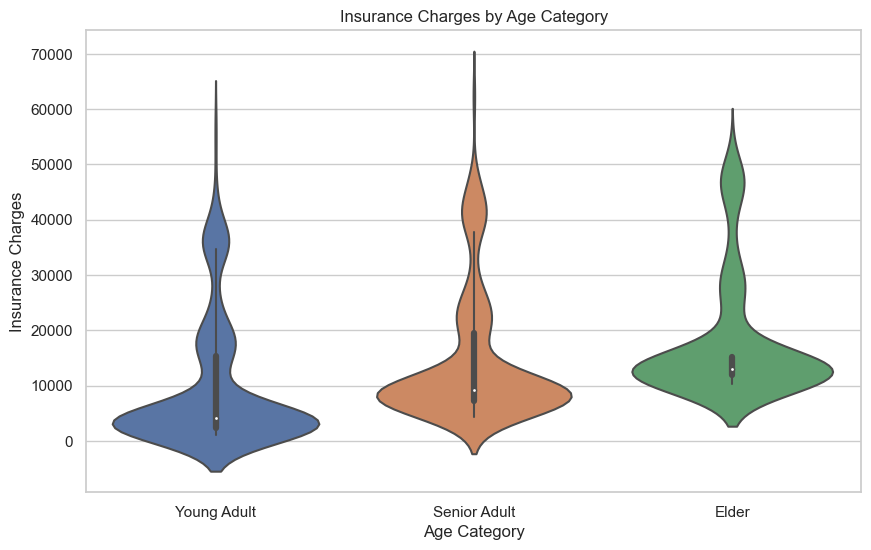

In [14]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='age_category', y='charges', data=df, order=['Young Adult', 'Senior Adult', 'Elder'])
plt.title('Insurance Charges by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Insurance Charges')

plt.show()


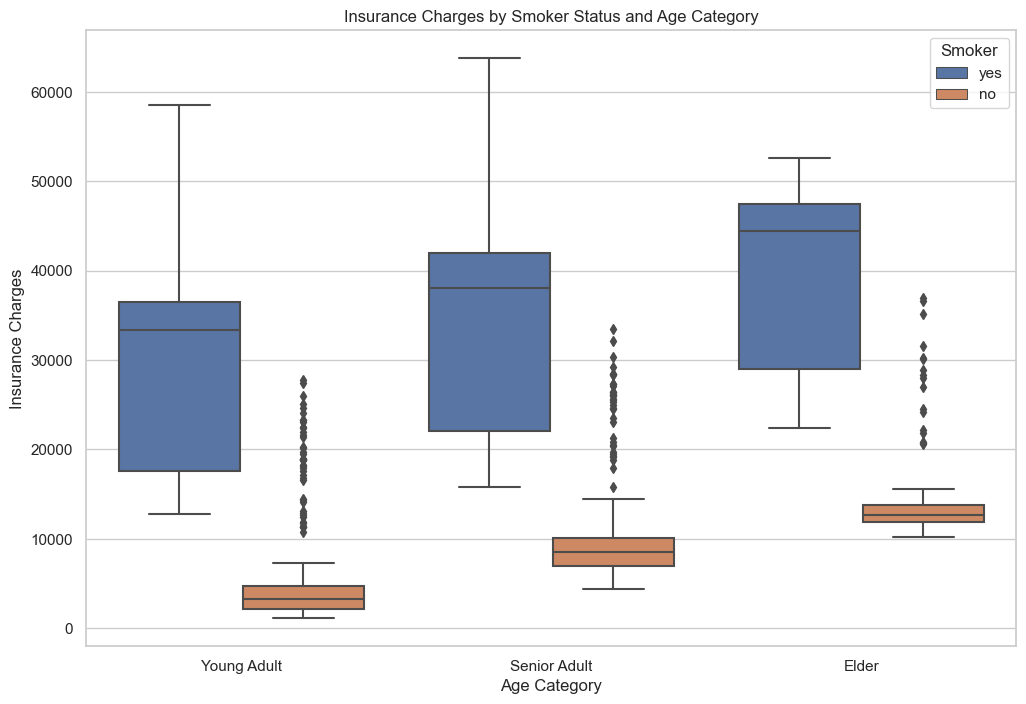

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.boxplot(x='age_category', y='charges', hue='smoker', data=df, order=['Young Adult', 'Senior Adult', 'Elder'])
plt.title('Insurance Charges by Smoker Status and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker', loc='upper right')

plt.show()


#### Charges and Region <a id='charges_region'></a>

C:\Users\Rashid\AppData\Local\Temp\ipykernel_14340\2003393858.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='charges', data=df, ci=None)


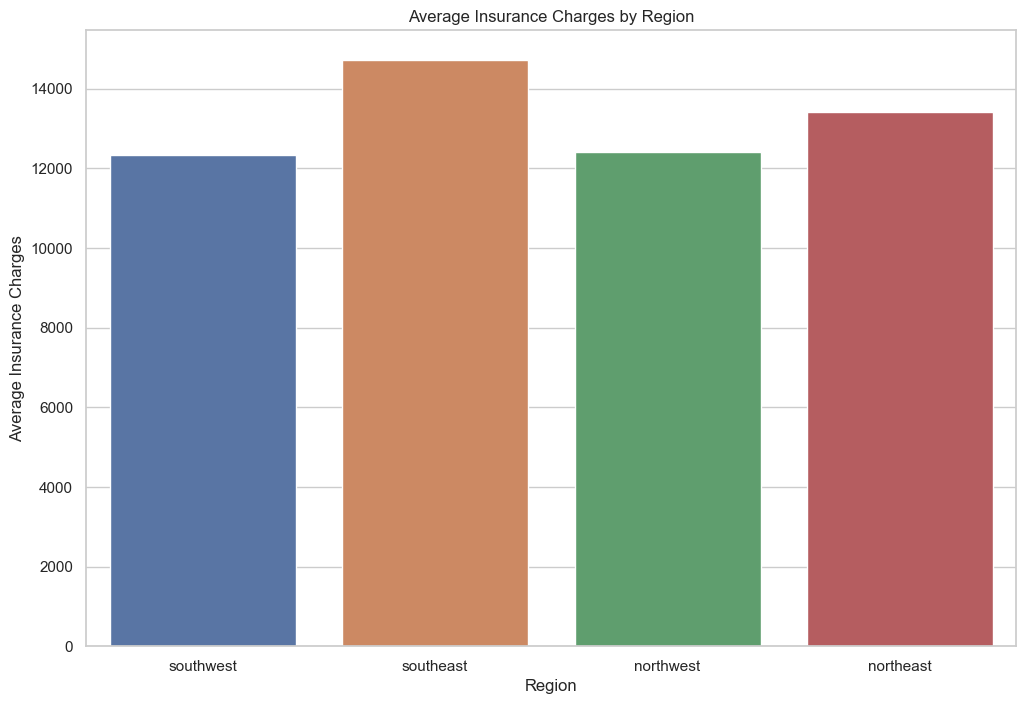

In [16]:
plt.figure(figsize=(12, 8))

sns.barplot(x='region', y='charges', data=df, ci=None)
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Insurance Charges')

plt.show()


In [17]:
y = df["charges"].values
X_num = df[["age","bmi"]]
X_cat = df[["sex","smoker","region", "children"]]

In [18]:
encoder = OneHotEncoder(sparse_output=False,drop='first')
encoder.fit(X_cat)
X_dummies = encoder.transform(X_cat)
X_full = np.c_[X_num, X_dummies]

In [19]:
X_full

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [28.  , 33.  ,  1.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [61.  , 29.07,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=12345)

In [21]:
## Model 1
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio1 = mean_squared_error(y_pred_train,y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio1)
print(r2_score(y_test, y_pred_test))



37043392.24681831
34111651.92810155
0.7608604037314577
1.0859454219601006


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12345)

In [23]:
## Model 2
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio2 = mean_squared_error(y_pred_train,y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio2)
print(r2_score(y_test, y_pred_test))

37043392.24681831
34111651.928101666
1.0859454219600968
0.7608604037314569


### Log & Polynomial transformations

In [25]:
log_y = np.log(y)
poly = PolynomialFeatures(5, include_bias=False)
X_poly = poly.fit_transform(X_full)
X_scaled = scaler.fit_transform(X_poly)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, log_y, test_size=0.2, random_state=12345)

### Model 3
model3 = LinearRegression(n_jobs=1)
model3.fit(X_train, y_train)
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio3 = mean_squared_error(y_pred_train,y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio3)
print(r2_score(y_test, y_pred_test))

0.07988065184160657
3.7090585585291715e+18
2.153663809322096e-20
-4.361335398303034e+18


### MinMaxScaler

In [30]:
## Model 4
scaler_mimax = MinMaxScaler()
X_scaled = scaler.fit_transform(X_poly)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, log_y, test_size=0.2, random_state=12345)

### Model 4
model4 = LinearRegression()
model4.fit(X_train, y_train)
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio4 = mean_squared_error(y_pred_train,y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio4)
print(r2_score(y_test, y_pred_test))

0.07988065184160657
3.7090585585291715e+18
2.153663809322096e-20
-4.361335398303034e+18


### Additional Feature transformations (BMI Age ratio & Age Children Difference)

In [31]:
# Feature - BMI/Age ratio
df['bmi_age_ratio'] = df['bmi'] / df['age']

# Feature - Age-Children difference
df['age_children_difference'] = df['age'] - df['children']

In [38]:
# Selecting original numerical features
X_num = df[["age", "bmi"]].copy()

# Adding new features
X_num['bmi_age_ratio'] = df['bmi_age_ratio']
X_num['age_children_difference'] = df['age_children_difference']

# Selecting original categorical features
X_cat = df[["sex", "smoker", "region", "children"]]

# Combine numerical and categorical features
X = pd.concat([X_num, X_cat], axis=1)

# Target var
y = df["charges"].values


In [39]:
encoder = OneHotEncoder(sparse_output=False,drop='first')
encoder.fit(X_cat)
X_dummies = encoder.transform(X_cat)
X_full = np.c_[X_num, X_dummies]

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

In [41]:
log_y = np.log(y)
poly = PolynomialFeatures(5, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
X_scaled = scaler.fit_transform(X_poly)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, log_y, test_size=0.2, random_state=12345)

In [42]:
## Model 5
model5 = LinearRegression()
model5.fit(X_train, y_train)
y_pred_train = model5.predict(X_train)
y_pred_test = model5.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
print(r2_score(y_test, y_pred_test))
ratio5 = mean_squared_error(y_pred_train,y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio5)
print(r2_score(y_test, y_pred_test))

0.04449745687711032
9.128025878918817e+17
-1.0733284943913536e+18
4.874817125560219e-20
-1.0733284943913536e+18
